*Warning*: Distribution/sharing of this notebook and other lab notebooks on the internet and other sources is strictly prohibited. You should not provide this notebook to anyone else. you should just use it for the purpose of this assessment only.

You should attempt and submit your work. you can refer to sources/APIs to complete this taks. Copying from each other even a part or so is strictly prohibited and may result in serious action.


# Assessment 5 : Big Data Analytics using Machine Learning
## Due Feburary 25th, 5pm (Firm)
### Total points: 100 ( weighted over 35)

This assessmet will enable you achieve essential experience of machine learning using sklearn and scalable approach to machine learning based on park ML! 

The focus of this assessment is to explore what makes videos popular on various platforms, e.g., Netflix and YouTube. The assessment will focus on YouTube 's data.

**PLEASE NOTE** There can be multiple solutions possible for this assessment. various students will end up implementing different solutions. Therefore, there is not a single solution to fit all students.

### Required Libraries 
Setup the libraries using the following cells. You should select Java 8 when prompted.

In [114]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 15 newly installed, 0 to remove and 39 not upgraded.
Need to get 43.5 MB of archives.
After this 

In [30]:
!pip3 install pandas==1.0.5
!pip3 install pyspark

In [31]:
# if restart of runtime is successful, the execution of this cell should
# prints True

import pandas as pd
print(pd.__version__ == '1.0.5')

True


In [32]:
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
from matplotlib import pyplot
import seaborn
import random
pd.options.mode.chained_assignment = None

Import your dataset using the following cells for the Youtube videos

In [33]:
#from google.colab import files
#uploaded = files.upload()

#!unzip /content/youtube_data.zip

In [34]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Section 5.1. : Machine Learning with Sklearn (45 points)

## 5.1.1 Data loading and Preprocessing (5 pts)

The dataset consists of a daily record of the top trending YouTube videos.

To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions, e.g., number of views, shares, comments and likes. "Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously viral “[Gangnam Style](https://www.youtube.com/watch?v=9bZkp7q19f0)”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for numerous countries, with up to 200 listed trending videos per day.

Each region’s data is in a separate file. Data includes:

*   Video Title
*   Channel title
*   Publish time
*   Tags
*   Views
*   Likes
*   Dislikes
*   Description
*   Comment count

The data also includes a category\_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the column metadata.



#### 5.1.1.1: Combining Multiple CSV's. (2 pts.)

There are multiple csv files in the dataset, each corresponding to a specific country. As a first step you need to read them and combine these csv files into a single dataframe. Use 'video_id' as your index.

While combining them, you also need to create a column for "country" and fill it in the final dataframe. The country name can be extracted using the filename itself.

Name your dataframe "combined_data".

In [35]:
# Import all the csv files
#files = [i for i in glob.glob('/content/youtube_data/*.csv'.format('csv'))]
files = [i for i in glob.glob('/content/gdrive/MyDrive/youtube-data/*.csv'.format('csv'))]
sorted(files)

# Task: Merge all dataframes to single dataframe "combined_data" and add a 'country' column. 
all_dataframes = list()
for csv in files:
  #all_dataframes.append(pd.read_csv(csv))
  frame = pd.read_csv(csv,index_col=0)
  frame['country'] = os.path.basename(csv)
  all_dataframes.append(frame)

combined_data = pd.concat(all_dataframes)
combined_data['country']=combined_data['country'].map(lambda x: x.lstrip('+-').rstrip('videos.csv'))
combined_data

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US
1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,US
D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US


#### 5.1.1.2: Map category Id's to categories (2 pts)

Read the category_id.json file and map the category_id's in the dataframe to the category name.

Use json.load to read in the data in the json file as a python dictionary and then map the category id given in the dataframe to category name from the json file. (Hint: the US json is likely the most comprehensive reference)




In [36]:
combined_data['category_id'] = combined_data['category_id'].astype(str)
js_files = [i for i in glob.glob('/content/gdrive/MyDrive/youtube-data/*.json')]
sorted(js_files)

id_to_category = {}
for x in js_files:
  js = pd.read_json(x)
  for category in js ["items"]:
        id_to_category[category["id"]] = category["snippet"]["title"]
combined_data["category"] = combined_data["category_id"].map(id_to_category)
# Add code here

#combined_data.insert(4, 'category', # Add code here)

combined_data.head(10)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category
video_id,,,,,,,,,,,,,,,,,
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,Music
0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA,Comedy
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment
2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA,Music
0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...,CA,News & Politics
_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...,CA,Comedy
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,CA,People & Blogs
JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...,CA,Entertainment


#### 5.1.1.3: Fix datetime format and remove rows with NA's (1 pt)

The 'publish_time' and 'trending_date' features are not in a unix datetime format, so use pandas to_datetime() to convert it into the right format.

After that is done remove all the rows which have NA's in them.

In [37]:
# Add code here
combined_data.info()
combined_data['trending_date'] = pd.to_datetime(combined_data["trending_date"],format ="%y.%d.%m")
combined_data['publish_time'] = pd.to_datetime(combined_data["publish_time"],format = "%Y-%m-%dT%H:%M:%S.%fZ")

# Add your Code here to remove NA's
combined_data = combined_data.dropna()
combined_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 159906 entries, n1WpP7iowLc to ooyjaVdt-jA
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   trending_date           159906 non-null  object
 1   title                   159906 non-null  object
 2   channel_title           159906 non-null  object
 3   category_id             159906 non-null  object
 4   publish_time            159906 non-null  object
 5   tags                    159906 non-null  object
 6   views                   159906 non-null  int64 
 7   likes                   159906 non-null  int64 
 8   dislikes                159906 non-null  int64 
 9   comment_count           159906 non-null  int64 
 10  thumbnail_link          159906 non-null  object
 11  comments_disabled       159906 non-null  bool  
 12  ratings_disabled        159906 non-null  bool  
 13  video_error_or_removed  159906 non-null  bool  
 14  description             15

In [38]:
# print
print('validate_na',(combined_data.shape))

validate_na (154567, 17)


## 5.2 Exploratory Data Analysis & Feature Engineering (20pt)


**Exploratory Data Analysis:** 
EDA aims to analyze data sets by summarizing its key characteristics assisted by visualizations. EDA communicates insights beyond formal modeling/hypothesis testing with or without statistical model.

**Feature Engineering:** 
The primary object of feature engineering is to extract features using domain knowledge. It aims to extract features from raw data using various data mining approaches.

These features are fed to various machine learning classifiers. These features are also called as covariates, predicators, or simply a new column in data frame.

#### 5.2.1: Calculating Mean, standard deviation, min and max. (1 pt)

In this section, we will focus to compute various satistics, i.e., mean, standard deviation, min and max for numerical features in the dataset and then store them into lists, i.e.,  [views, likes, dislikes, comment_count].

means = [views_mean, likes_mean, dislikes_mean, comment_count_mean] and similarly for mins, maxs and stds.

In [39]:
combined_data.describe()

,views,likes,dislikes,comment_count
count,1.545670e+05,1.545670e+05,1.545670e+05,1.545670e+05
mean,1.281578e+06,4.096105e+04,2.056138e+03,4.606594e+03
std,4.605292e+06,1.521490e+05,1.825854e+04,2.327823e+04
min,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.574900e+04,1.321000e+03,8.100000e+01,1.720000e+02
50%,3.134280e+05,6.336000e+03,2.980000e+02,7.650000e+02
75%,9.473390e+05,2.594050e+04,1.024000e+03,2.726000e+03
max,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06


In [40]:

# Add your code here
maxs = combined_data.describe().iloc[7].values.tolist()
mins = combined_data.describe().iloc[3].values.tolist()
stds = combined_data.describe().iloc[2].values.tolist()
means = combined_data.describe().iloc[1].values.tolist()



In [41]:
# print here
print('check_min_max_mean_std',([maxs, mins, stds, means]))


check_min_max_mean_std [[225211923.0, 5613827.0, 1643059.0, 1228655.0], [223.0, 0.0, 0.0, 0.0], [4605292.478385788, 152148.9548547498, 18258.541379661325, 23278.225620620095], [1281578.03423758, 40961.05191276275, 2056.138490104615, 4606.593742519425]]


#### 5.2.2: Rescaling the features (1 pt)

From the above section, it is clear that the numerical values range is really high.  we can use rescaling to avoid numerical instability problems. We can rescale likes, views, dislikes, and comment_count using log scale (base e). Let us store rescaled features in dataframe as likes_log, views_log, dislikes_log and comment_log.

NOTE- log 0 is not defined, therefore, you should add 1 to each value prior to taking the log.

In [42]:
# Add your code here
combined_data['likes_log'] = np.log(1 + combined_data['likes']) 
combined_data['views_log'] = np.log(1 + combined_data['views']) 
combined_data['dislikes_log'] = np.log(1 + combined_data['dislikes']) 
combined_data['comment_log'] = np.log(1 + combined_data['comment_count']) 

In [43]:
# Print results
print('check_feature_rescaling',([np.mean(combined_data['likes_log']),np.mean(combined_data['views_log']),np.mean(combined_data['dislikes_log']),
                                         np.mean(combined_data['comment_log'])]))

check_feature_rescaling [8.571590187188708, 12.552679805013122, 5.614484952081185, 6.424543615108382]


#### 5.2.3: Plotting the distribution (2 pt)

Plot the distribution for the newly created log features. They should look like normal distribution curves.

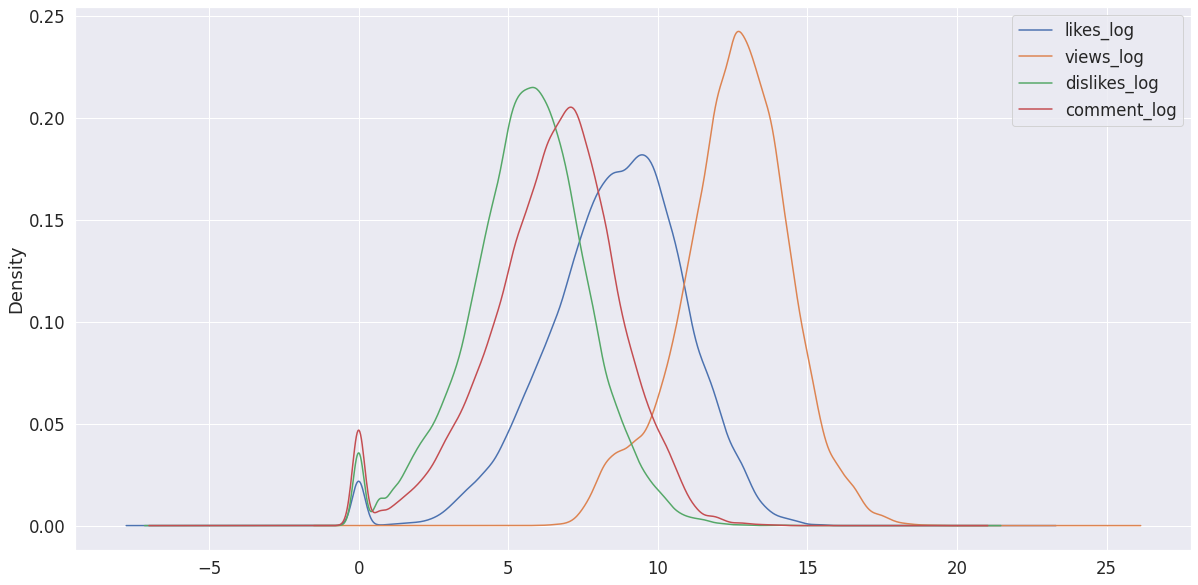

In [44]:
# Add your code here for plotting the distribution
log_df=combined_data[['likes_log','views_log','dislikes_log','comment_log']]
log_df.plot.kde(figsize=(20,10))
# plot data

#### 5.2.4: Comparing views, likes, dislikes against categories (3 pt)

Let us gain isights into data using various catergories, views, likes and dislikes.

Draw three plots for the following:

1.) How many videos are there for each category?

2.) What is the distribution of views against categories? (Use boxplot and views on log scale)

3.) What is the distribution of dislikes against categories? (Use boxplot and dislikes on log scale)

For extra credit:
You can try to gain more insights into the dataset by drawing interesting plots. Some ideas include:

* How long does a video trend in a country? 
* What are some videos which got popular because they were disliked? 

Think of such interesting things and add here. We will award points based on creativity of the insights that you get.

In [45]:
# Your code goes here
# Plots will be manually graded
##1-Total videos for each category:
by_category = combined_data.groupby(["category"]).size().sort_values(ascending = False)
print('Total videos for each category: \n', by_category)

Total videos for each category: 
 category
Entertainment            48964
Music                    17818
Comedy                   14790
News & Politics          14713
People & Blogs           13954
Sports                    9488
Howto & Style             9309
Film & Animation          7874
Science & Technology      4846
Education                 4544
Gaming                    3592
Pets & Animals            1522
Autos & Vehicles          1406
Travel & Events            889
Shows                      485
Nonprofits & Activism      338
Movies                      33
Trailers                     2
dtype: int64


In [46]:
import plotly.express as px
df_cat=pd.DataFrame(by_category)
df_cat['category'] = df_cat.index
df_cat.columns=['a','b']
fig4 = px.bar(df_cat, x="b", y="a",color='a',labels={'b':'Category','a':'Videos/Category'}, height=400)
fig4.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})

(Text(0.5, 1.0, 'Distribution of Views against Categories'),
 Text(0.5, 0, 'Video Category'),
 Text(0, 0.5, 'View Logs'))

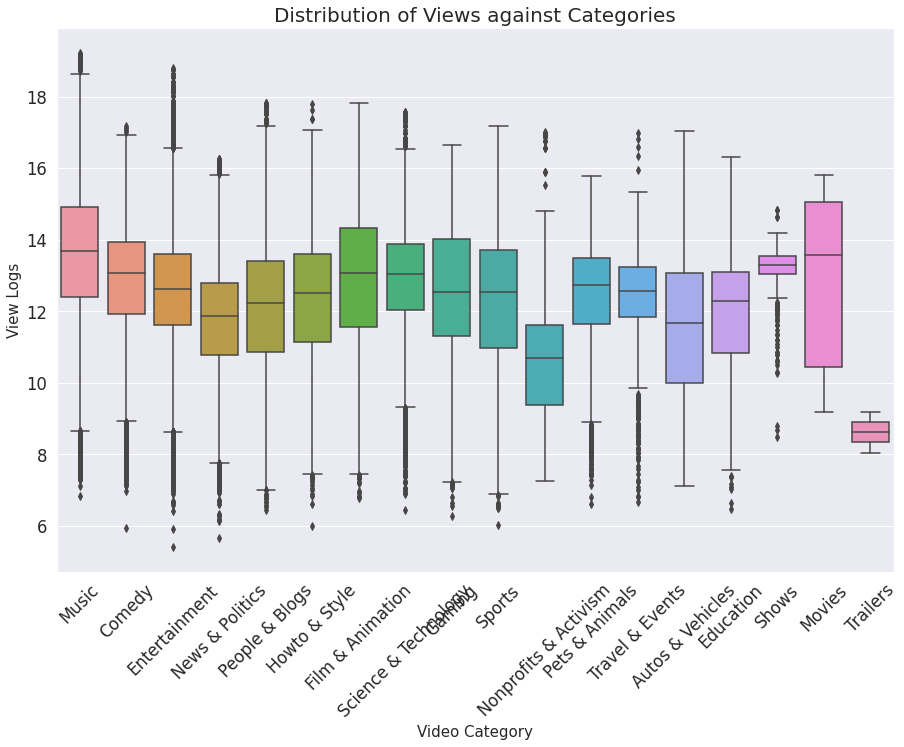

In [47]:
##2-Distribution of views against categories, using boxplot and views on log scale
fig, ax = pyplot.subplots(figsize=(15,10))
sns.boxplot(x="category", y="views_log", data=combined_data[['category','views_log']]),plt.xticks(rotation = 45)
ax.set_title("Distribution of Views against Categories",fontsize=20),ax.set_xlabel('Video Category',fontsize=15),ax.set_ylabel(ylabel='View Logs',fontsize=15)          
# #To close the warning
# fill with colors

(Text(0.5, 1.0, 'Distribution of Dislikes against Categories'),
 Text(0.5, 0, 'Video Category'),
 Text(0, 0.5, 'Dislike Logs'))

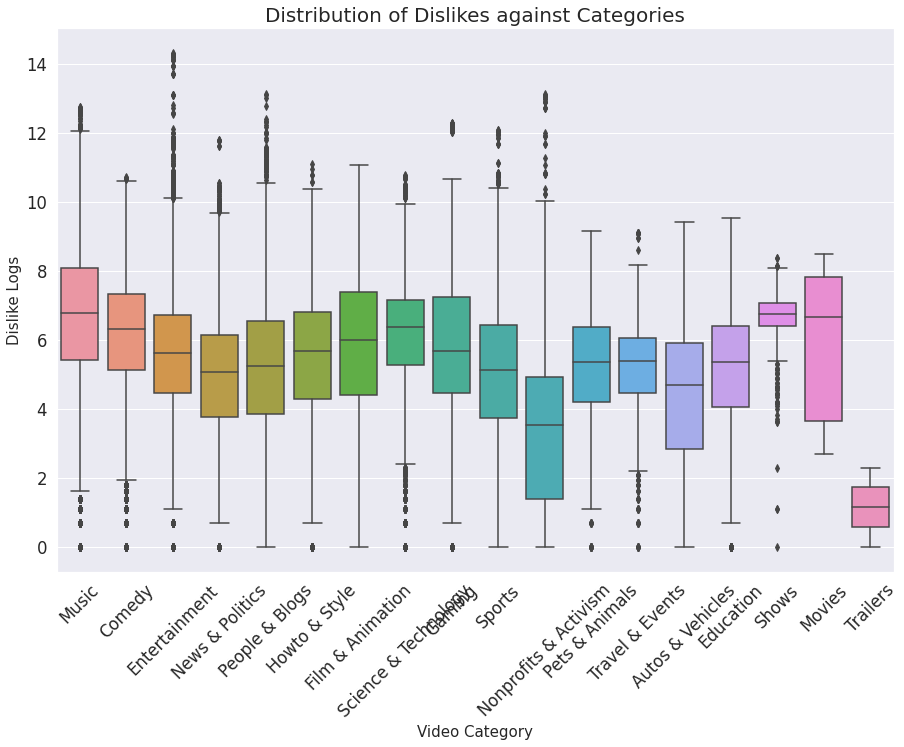

In [48]:
##3-Distribution of dislikes against categories, Using boxplot and dislikes on log scale
fig, ax = pyplot.subplots(figsize=(15,10))
sns.boxplot(x="category", y="dislikes_log", data=combined_data[['category','dislikes_log']]),plt.xticks(rotation = 45)
ax.set_title("Distribution of Dislikes against Categories",fontsize=20),ax.set_xlabel('Video Category',fontsize=15),ax.set_ylabel(ylabel='Dislike Logs',fontsize=15)  


In [49]:
#How long does a video trend in a country?
#What are some videos which got popular because they were disliked?

**How long does a video trend in a country?**

(<matplotlib.axes._subplots.AxesSubplot at 0x7f66bde51c50>,
 Text(0.5, 1.0, 'Number of Mean Video Trending in Each Country '))

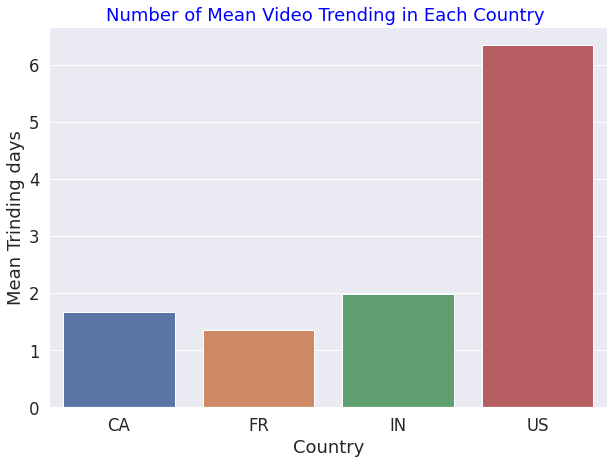

In [50]:
df=combined_data.drop_duplicates()
df1=df.groupby(['title','country']).size().reset_index(name='count')
trending=df1.groupby('country')['count'].mean().to_frame().reset_index().rename(columns={"country": "Country", "count": "Mean Trinding days"})

fig, ax = pyplot.subplots(figsize=(10, 7)),sns.set(font_scale=1.5)
sns.barplot(x="Country", y="Mean Trinding days", data=trending,ax=ax),plt.title('Number of Mean Video Trending in Each Country ',color='Blue')

**What are some videos which got popular because they were disliked?**

In [51]:
df2=df.groupby(['title','dislikes','likes']).size().reset_index(name='Trend_Days')
trending_dislikes=df2.loc[(df2['dislikes'] > df2['likes']) & (df2['Trend_Days'] >= 3)] #Videos which got trends and have dislikes more than likes#
trending_dislikes=trending_dislikes.sort_values(['Trend_Days'],ascending=[ False])
print('Videos which got popular because they were disliked: \n \n',trending_dislikes.title.to_string(index=False))

Videos which got popular because they were disliked: 
 
  Jeffrey Tambor Fired From 'Transparent' Follow...
 5 Things You Missed at the 2018 SAG Awards | E...
 Fergie Performs The U.S. National Anthem / 201...
                        Staudt on Sports I 1-22-18
         WATCH: Sen. Mitch McConnell on tax reform
                               二贵摔跤 - tienghoa.net


#### 5.2.5: Feature Engineering (8 pts)



##### a. Processing tags (1 pt)

The feature tags in the dataset has a delimiter, use that delimiter to count the number of tags, create a feature called num_tags and add that to the dataset.

In [52]:
# Add your code here
num_tags=[]
xdf=combined_data.reset_index(drop=True)
for i in range(len(combined_data)):
  if xdf.at[i,'tags']=='[none]': #some videos has no tags but instead [none], so we are going to consider it as Zero tags.
    count=0
  else:
    count=(xdf.at[i,'tags']).count("|") + 1 
  num_tags.append(count)
combined_data['num_tags']=num_tags
combined_data


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category,likes_log,views_log,dislikes_log,comment_log,num_tags
video_id,,,,,,,,,,,,,,,,,,,,,,
n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,Music,13.576525,16.658009,10.678698,11.743108,6
0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,11.758183,13.830056,7.431892,9.475086,11
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA,Comedy,11.891608,14.975981,8.582981,9.009692,23
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment,11.792374,14.555460,7.595890,9.771041,14
2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA,Music,14.306622,17.327761,9.956222,11.351206,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,2018-06-14,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18 16:39:29,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",US,People & Blogs,13.378383,15.926830,8.307213,11.044696,27
BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US,Pets & Animals,10.549569,14.337638,7.234177,7.885329,14
D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US,Entertainment,10.780393,13.879848,6.940222,8.292298,24


##### b. Processing description and title (2 pts.)

Calculate the length of description and title and add them as features to the dataset

In [53]:
# Add your code here
combined_data["desc_len"]=combined_data["description"].apply(lambda x: len(x))

In [54]:
# Add your code here

combined_data["len_title"]=combined_data["title"].apply(lambda x: len(x))

In [55]:
# Print cell
print('check_tags_title_description \n',([combined_data['num_tags'].describe(),combined_data['desc_len'].describe(),combined_data['len_title'].describe()]))

check_tags_title_description 
 [count    154567.000000
mean         18.580551
std          11.929906
min           0.000000
25%           9.000000
50%          17.000000
75%          26.000000
max         124.000000
Name: num_tags, dtype: float64, count    154567.000000
mean        959.949426
std         857.504028
min           1.000000
25%         363.000000
50%         717.000000
75%        1288.000000
max        5260.000000
Name: desc_len, dtype: float64, count    154567.000000
mean         56.408541
std          22.976198
min           2.000000
25%          38.000000
50%          54.000000
75%          74.000000
max         100.000000
Name: len_title, dtype: float64]


##### c. Processing publish_time. (4 pts.)


Split 'publish_time' feature into three parts time, date, and weekday, where time will contain the time component of the original feature and date and weekday will store the corresponding date and weekday number respectively. Start with 1 for Monday and end with 7 for Sunday.

In [56]:
date_data=combined_data['publish_time']

In [57]:
# Add your code here
combined_data['publish_time'] =date_data.apply(lambda x: pd.to_datetime(x).time())
combined_data['publish_date'] =date_data.apply(lambda x: pd.to_datetime(x).date())

#day on which video was published
combined_data['publish_weekday']=date_data.apply(lambda x: x.dayofweek)+1

import random
random_index = random.randint(0,combined_data.shape[0]-1)


In [58]:
# Print cell
print('check_date_time_processing',([combined_data['publish_time'].iloc[random_index],combined_data['publish_date'].iloc[random_index],sorted(list(combined_data["publish_weekday"].value_counts()))]))

check_date_time_processing [datetime.time(19, 51, 16), datetime.date(2018, 2, 14), [18641, 18931, 22146, 22501, 22523, 23573, 26252]]


##### d. Number of videos per weekday (1 pt)

Calculate the number of videos published per day of the week. Which day of the week do people publish most videos? Make a visualization demonstrating the result.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f66c4164150>,
 Text(0.5, 1.0, 'Number of puplished videos per week days '))

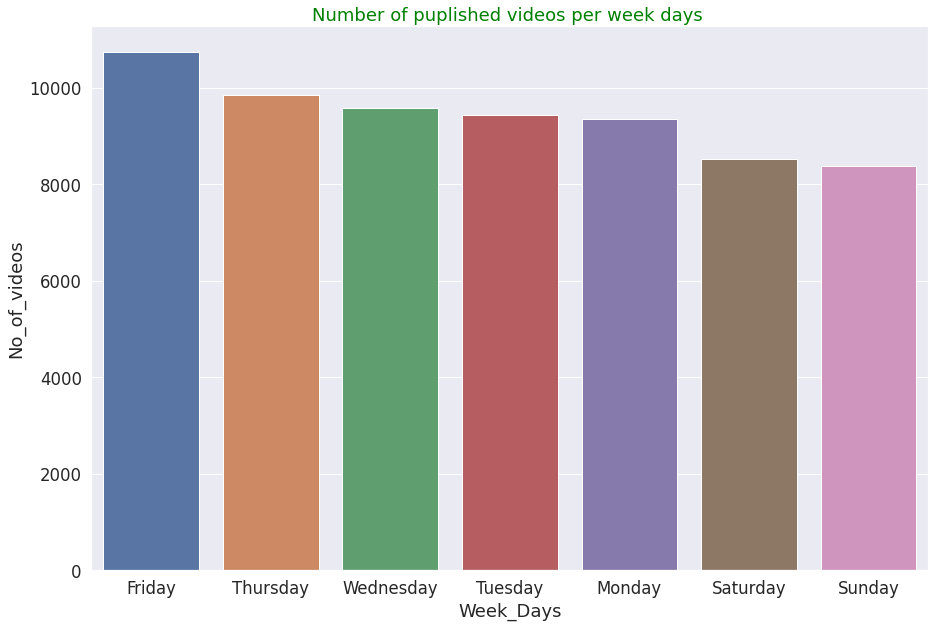

In [59]:
# Add your code for plot here

##Creating dataframe after deleting videos which stay trending for more than one day according to the Video ID
dfx=combined_data.reset_index(level=0)[['video_id','publish_weekday']].drop_duplicates(subset = ['video_id'], keep = 'last')

##Mapping the day number : day name
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
dfx['publish_weekday'] = dfx['publish_weekday'].map(dayOfWeek)

##Calculating and plotting
videos_weekday = dfx['publish_weekday'].value_counts().to_frame().reset_index().rename(columns={"index": "Week_Days", "publish_weekday": "No_of_videos"})
fig, ax = pyplot.subplots(figsize=(15, 10)),sns.set(font_scale=1.5)
sns.barplot(x="Week_Days", y="No_of_videos", data=videos_weekday,ax=ax),plt.title('Number of puplished videos per week days ',color='Green')
# Plots will be manually graded

#### 5.2.6: Dropping irrelevant non numeric columns (1 pt.)

Drop all the columns that are non-numeric as we have processed them and stored the information captured in them in the dataset as numbers. 

Note that a few key columns are non-numeric but should be kept in the dataframe:

comments_disabled, ratings_disabled, video_error_or_removed, country

Also drop original views, like, comments and dislikes as you have processed them as logs and stored them as separate feature. 

In [60]:
combined_data.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log', 'num_tags',
       'desc_len', 'len_title', 'publish_date', 'publish_weekday'],
      dtype='object')

In [61]:
# Add your code here
combined_data.drop(['trending_date', 'title', 'channel_title', 'category_id',
                    'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
                    'thumbnail_link', 'description', 'publish_date'], axis = 1,inplace = True)

In [62]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,country,category,likes_log,views_log,dislikes_log,comment_log,num_tags,desc_len,len_title,publish_weekday
video_id,,,,,,,,,,,,,
n1WpP7iowLc,False,False,False,CA,Music,13.576525,16.658009,10.678698,11.743108,6,594,42,5
0dBIkQ4Mz1M,False,False,False,CA,Comedy,11.758183,13.830056,7.431892,9.475086,11,704,29,1
5qpjK5DgCt4,False,False,False,CA,Comedy,11.891608,14.975981,8.582981,9.009692,23,1177,53,7
d380meD0W0M,False,False,False,CA,Entertainment,11.792374,14.555460,7.595890,9.771041,14,636,24,7
2Vv-BfVoq4g,False,False,False,CA,Music,14.306622,17.327761,9.956222,11.351206,10,1250,43,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,US,People & Blogs,13.378383,15.926830,8.307213,11.044696,27,926,52,5
BZt0qjTWNhw,False,False,False,US,Pets & Animals,10.549569,14.337638,7.234177,7.885329,14,46,28,5
D6Oy4LfoqsU,False,False,False,US,Entertainment,10.780393,13.879848,6.940222,8.292298,24,775,84,5


#### 5.2.7: Convert categorical features in the dataset into one hot vectors. (3 pts)

There are three categorical features remaining in the dataset, identify them and convert them into one hot vectors. Be sure that when you one hot encode, the original column is replaced.

In [63]:
combined_data.publish_weekday = combined_data.publish_weekday.astype('category')
combined_data.country = combined_data.country.astype('category')
combined_data.category = combined_data.category.astype('category')
combined_data= pd.get_dummies(combined_data)
# Hint: Use pd.get_dummies()range. 

In [64]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,views_log,dislikes_log,comment_log,num_tags,desc_len,len_title,country_CA,country_FR,country_IN,country_US,category_Autos & Vehicles,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Movies,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Trailers,category_Travel & Events,publish_weekday_1,publish_weekday_2,publish_weekday_3,publish_weekday_4,publish_weekday_5,publish_weekday_6,publish_weekday_7
video_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
n1WpP7iowLc,False,False,False,13.576525,16.658009,10.678698,11.743108,6,594,42,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
0dBIkQ4Mz1M,False,False,False,11.758183,13.830056,7.431892,9.475086,11,704,29,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5qpjK5DgCt4,False,False,False,11.891608,14.975981,8.582981,9.009692,23,1177,53,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
d380meD0W0M,False,False,False,11.792374,14.555460,7.595890,9.771041,14,636,24,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2Vv-BfVoq4g,False,False,False,14.306622,17.327761,9.956222,11.351206,10,1250,43,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,13.378383,15.926830,8.307213,11.044696,27,926,52,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
BZt0qjTWNhw,False,False,False,10.549569,14.337638,7.234177,7.885329,14,46,28,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
D6Oy4LfoqsU,False,False,False,10.780393,13.879848,6.940222,8.292298,24,775,84,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [65]:
# Print cell.
print('check_final_df',(combined_data.shape))

check_final_df (154567, 39)


Let's write out the modified data we created to a file so that we can reuse it in Section 2.

In [66]:
combined_data_sec_2 = combined_data.copy()
combined_data_sec_2.rename(columns = {'views_log':'label'}, inplace = True) 
combined_data_sec_2.to_csv('combined_data.csv')

#### 5.2.8: Split into x and y (1 pt)

Split the data into features and label, in this case the features are anything but views_log and the label is views_log.

In [67]:
combined_data.columns

Index(['comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log', 'num_tags',
       'desc_len', 'len_title', 'country_CA', 'country_FR', 'country_IN',
       'country_US', 'category_Autos & Vehicles', 'category_Comedy',
       'category_Education', 'category_Entertainment',
       'category_Film & Animation', 'category_Gaming',
       'category_Howto & Style', 'category_Movies', 'category_Music',
       'category_News & Politics', 'category_Nonprofits & Activism',
       'category_People & Blogs', 'category_Pets & Animals',
       'category_Science & Technology', 'category_Shows', 'category_Sports',
       'category_Trailers', 'category_Travel & Events', 'publish_weekday_1',
       'publish_weekday_2', 'publish_weekday_3', 'publish_weekday_4',
       'publish_weekday_5', 'publish_weekday_6', 'publish_weekday_7'],
      dtype='object')

In [68]:
# Add your code here
combined_data=pd.read_csv('combined_data.csv').set_index('video_id')
label = combined_data['label']
features = combined_data.drop(['label'],axis=1)

In [69]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,label,dislikes_log,comment_log,num_tags,desc_len,len_title,country_CA,country_FR,country_IN,country_US,category_Autos & Vehicles,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Movies,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Trailers,category_Travel & Events,publish_weekday_1,publish_weekday_2,publish_weekday_3,publish_weekday_4,publish_weekday_5,publish_weekday_6,publish_weekday_7
video_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
n1WpP7iowLc,False,False,False,13.576525,16.658009,10.678698,11.743108,6,594,42,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
0dBIkQ4Mz1M,False,False,False,11.758183,13.830056,7.431892,9.475086,11,704,29,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5qpjK5DgCt4,False,False,False,11.891608,14.975981,8.582981,9.009692,23,1177,53,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
d380meD0W0M,False,False,False,11.792374,14.555460,7.595890,9.771041,14,636,24,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2Vv-BfVoq4g,False,False,False,14.306622,17.327761,9.956222,11.351206,10,1250,43,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,13.378383,15.926830,8.307213,11.044696,27,926,52,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
BZt0qjTWNhw,False,False,False,10.549569,14.337638,7.234177,7.885329,14,46,28,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
D6Oy4LfoqsU,False,False,False,10.780393,13.879848,6.940222,8.292298,24,775,84,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [70]:
# print cell
print('check_x_y_split',([features.shape, label.describe()]))

check_x_y_split [(154567, 38), count    154567.000000
mean         12.552680
std           1.816821
min           5.411646
25%          11.469496
50%          12.655328
75%          13.761413
max          19.232552
Name: label, dtype: float64]


## 5.3 : Machine Learning using sklearn (15 pts)

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

You can find the documentation [here](https://scikit-learn.org/stable/modules/classes.html)

Now we will train some machine learning models using sklearn to predict views, rather than predicting views directly we will predict views_log to avoid numerical instability issues

### 5.3.1 : Split data into train and test (1 pt)

Use sklearn's train_test_split library and split data into train and test sets, the split should be 80-20 meaning 80% for training and rest for testing.


In [71]:
from sklearn.model_selection import train_test_split
# Add your code here
x_train, x_test, y_train, y_test = train_test_split(features.values, label.values, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [72]:
# print cell.
print('check_data_split',[x_train.shape,x_test.shape,y_train.shape,y_test.shape])

check_data_split [(123653, 38), (30914, 38), (123653,), (30914,)]


### 5.3.2: Train Machine Learning Models.

#### 5.3.2.1 Linear Regression (3 pts)

In this step we will train a linear regression model using sklearn. Train using the training data and then make predictions of test, report the mean squared error obtained on both train and test sets.

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Add your code here
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

# Create linear regression object
lin_R = LinearRegression()

# Train the model using the training sets
lin_R.fit(x_train, y_train)

# Make predictions

y_predict_test = lin_R.predict(x_test)
y_predict_train= lin_R.predict(x_train)

# The coefficients
#print('Coefficients: \n', lin_R.coef_)

print('r Squared: %.2f'
      % lin_R.score(x_test, y_test))

print('mse_value of Test=',mean_squared_error(y_test, y_predict_test))
print('mse_value of Train=',mean_squared_error(y_train, y_predict_train))
mse_test= mean_squared_error(y_test, y_predict_test)

r Squared: 0.86
mse_value of Test= 0.4543903582895986
mse_value of Train= 0.44341745942129557


In [74]:
print('check_lr', (np.sqrt(mean_squared_error(y_test, y_predict_test))))

check_lr 0.6740848301880102


#### 5.3.2.2  Dimensionality reduction with PCA (6 pts)



##### Step 1: Fitting PCA and explained_variance_ratiio
Use Principal component analysis to reduce number of dimensions of the dataset, as a first step fit a pca model on your train set and then plot the explained_variance_ratio against the number of components to decide the number of components you should keep. (3 pts)

[(0, 0.09129829876882628), (1, 0.13965498251638492), (2, 0.1783578312103662), (3, 0.21673572836207589), (4, 0.25091827290172397), (5, 0.28441095398698096), (6, 0.31719028032989804), (7, 0.34866828856800114), (8, 0.37980359227444893), (9, 0.41076816390877624), (10, 0.44135763491056446), (11, 0.4712459726517391), (12, 0.5007926347021824), (13, 0.5295817209550874), (14, 0.5579410552958118), (15, 0.5860037182363459), (16, 0.6134769425540194), (17, 0.6405233002420325), (18, 0.6673701395155293), (19, 0.6940081951271505), (20, 0.720502636860788), (21, 0.746827151094989), (22, 0.7731357232530728), (23, 0.7992824292915695), (24, 0.8250389406411438), (25, 0.8505418595620441), (26, 0.8755491615990497), (27, 0.9002662470905268), (28, 0.9228026345765791), (29, 0.9431659606276278), (30, 0.9621967406606502), (31, 0.9794410925323944), (32, 0.9949084593586077), (33, 0.9983070958721263), (34, 0.9999999999999994), (35, 0.9999999999999994), (36, 0.9999999999999994), (37, 0.9999999999999994)]


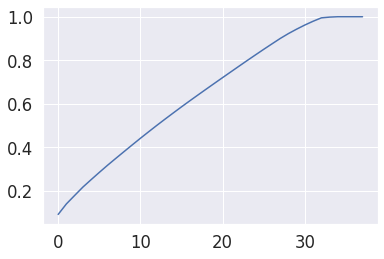

In [75]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Add your code here

pca = PCA()
sc = StandardScaler()
x_train_std=pca.fit_transform(x_train)
np.set_printoptions(suppress=True)
var_vs_pca = np.cumsum(pca.explained_variance_ratio_)
print([(i,x) for i, x in enumerate(var_vs_pca)])
# plotting the explained_variance_ratio against the number of components
plt.plot(var_vs_pca)

[(0, 0.09129829876882628), (1, 0.13965498251638492), (2, 0.1783578312103662), (3, 0.21673572836207589), (4, 0.25091827290172397), (5, 0.28441095398698096), (6, 0.31719028032989804), (7, 0.34866828856800114), (8, 0.37980359227444893), (9, 0.41076816390877624), (10, 0.44135763491056446), (11, 0.4712459726517391), (12, 0.5007926347021824), (13, 0.5295817209550874), (14, 0.5579410552958118), (15, 0.5860037182363459), (16, 0.6134769425540194), (17, 0.6405233002420325), (18, 0.6673701395155293), (19, 0.6940081951271505), (20, 0.720502636860788), (21, 0.746827151094989), (22, 0.7731357232530728), (23, 0.7992824292915695), (24, 0.8250389406411438), (25, 0.8505418595620441), (26, 0.8755491615990497), (27, 0.9002662470905268), (28, 0.9228026345765791), (29, 0.9431659606276278), (30, 0.9621967406606502), (31, 0.9794410925323944), (32, 0.9949084593586077), (33, 0.9983070958721263)]


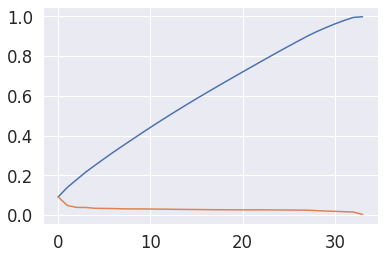

In [76]:
#It is strating faltten with number of component = 34 (99% of variance)
pca = PCA(34)
x_train_std=pca.fit_transform(x_train)
np.set_printoptions(suppress=True)
var_vs_pca = np.cumsum(pca.explained_variance_ratio_)
print([(i,x) for i, x in enumerate(var_vs_pca)])
# plotting the explained_variance_ratio against the number of components
plt.plot(var_vs_pca)
plt.plot(pd.Series(pca.explained_variance_ratio_))

##### Step 2: Deciding number of components to keep
Use the plot to decide the number of components to keep, choose a number that explains atleast 95% of variance in the dataset. Then fit and transform your pca on training set using the number of components you decided. (1 pts)

**Remember that your pca should be trained on the training set (and transformed here) but only transformed on the test set.**

In [77]:
# Add your code here
pca = PCA(n_components=34)
x_train_Trans=pca.fit_transform(x_train)
x_test_Trans=pca.transform(x_test)

In [78]:
# Print cell.
print('check_pca', (x_train_Trans[:50,:]))

check_pca [[-1.3838991  -0.85852892 -1.31930495 ...  0.63067578  0.33063991
  -0.00534801]
 [-1.96714704 -1.44302972 -1.24641971 ...  0.28984139 -1.04900918
   0.24581668]
 [-1.84641478  0.71242142 -1.06623197 ...  0.22220311  0.10693451
  -0.22619463]
 ...
 [ 0.37774881 -1.01558303 -0.20174008 ...  0.62650732 -0.42777416
  -0.15473918]
 [ 3.61369751  1.64807486 -0.55733017 ... -0.28225765 -1.41590647
   0.41312335]
 [ 0.76839011 -2.05399396 -0.10124339 ... -0.35490502  0.61395229
  -0.32288643]]


### 5.3.2.3 Random Forest. (10 pts)



##### Step 1: Hyperparameter tuning. 
Use grid search and train a random forest model on the transformed train dataset. Take a look at the sklearn `RandomForestRegressor` documentation and tune the max_depth hyperparameter using grid search. We have already tested the number of estimators hyperparameter for you. Note this section may take a while to run depending on how large your grid is. 

(Hint: refer to the GridSearchCV documentation and do some reading on how the max_depth in a RF model affects the result - while theory may help guide a rough estimate of possible hyperparameters, we can cross validate values using tools like GridSearch.

Our autograder has tiered points for this question depending on your final MSE value but is fairly generous; we are not requiring that you find the **most** optimal value for this hyperparameter but rather demonstrate understanding of grid search optimization. (4 pts)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Add your code here
# Only tune the max depth of the trees in the RF hyperparameter.
grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid={'n_estimators':[140],'max_depth':[25,30,35,40,45]},cv=5)
grid.fit(x_train_Trans, y_train)
grid.best_params_
# depth = [40]
# nEstimator = [140]

{'max_depth': 40, 'n_estimators': 140}

##### Step 2: Fitting RF
Fit the random forest on the training data using the parameters you computed above. Then make predictions on the test set, report the root mean squared error for the test set. (3 pts)

In [ ]:
# Add your code here
# Set n_estimators = 140
reg_RF = RandomForestRegressor(n_estimators=140, max_depth=40)
reg_RF.fit(x_train_Trans, y_train)
y_pred_RF = reg_RF.predict(x_test_Trans)

In [ ]:
# Print cell
print('check_rf', (np.sqrt(mean_squared_error(y_test, y_pred_RF))))

check_rf 0.4819144258857594


## Almost halfway there :)

Well done! Almost halfway there :)



# Section 2 : Distributed Machine Learning with Spark (55 Points)

Apache Spark ML is the machine learning library consisting of common learning algorithms and utilities, including classification, regression, clustering, collaborative filtering, dimensionality reduction, and underlying optimization primitives.

Why Spark ML?

Moving to the Big Data Era requires heavy iterative computations on very big datasets. Standard implementations of machine learning algorithms require very powerful machines to be able to run. Depending on high-end machines is not advantageous due to their high price and improper costs of scaling up. The idea of using distributed computing engines is to distribute the calculations to multiple low-end machines (commodity hardware) instead of a single high-end one. This definitely speeds up the learning phase and allows us to create better models.

Read more about it with the python documentation [here](https://spark.apache.org/docs/latest/ml-guide.html)

### Initializing Spark Connection - Boring setup stuff again


In [80]:
!apt install libkrb5-dev
!wget https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libkrb5-dev is already the newest version (1.16-2ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
--2021-03-01 15:14:43--  https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
Resolving www-us.apache.org (www-us.apache.org)... 207.244.88.140
Connecting to www-us.apache.org (www-us.apache.org)|207.244.88.140|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://downloads.apache.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz [following]
--2021-03-01 15:14:43--  https://downloads.apache.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 2a01:4f8:10a:201a::2
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-03-01 15:14:44 ERROR 404: Not F

In [81]:
!apt update
!apt install gcc python-dev libkrb5-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa

In [82]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('CA-5').getOrCreate()


In [83]:
%load_ext sparkmagic.magics

In [84]:
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd
# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-2.4.5-bin-hadoop2.7'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [85]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)


### 5.1 Data Preparation for Spark ML (20 points)

Once the spark setup ready. Next, we need the prepared data for our ML algorithms. We will use the same data you processed in Section 1 but now in spark. 

Read in the csv  into a spark dataframe. Set the "inferSchema" flag to True so that the columns are the correct datatypes and not all strings. Further, set the parameter to the first row as column headers.

In [86]:
# Add your code here

train_sdf = spark.read.format('csv').options(header='true', inferSchema='true').load('combined_data.csv')

Let us make sure everything is smooth to proceed

In [87]:
display(train_sdf.show())

+-----------+-----------------+----------------+----------------------+------------------+------------------+------------------+------------------+--------+--------+---------+----------+----------+----------+----------+-------------------------+---------------+------------------+----------------------+-------------------------+---------------+----------------------+---------------+--------------+------------------------+------------------------------+-----------------------+-----------------------+-----------------------------+--------------+---------------+-----------------+------------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|   video_id|comments_disabled|ratings_disabled|video_error_or_removed|         likes_log|             label|      dislikes_log|       comment_log|num_tags|desc_len|len_title|country_CA|country_FR|country_IN|country_US|category_Autos & Vehicles|category_Comedy|categ

None

Print out the dataframe schema and verify the datatypes

In [88]:
#Task: Print the dataframe schema and verify
# Add your code here
display(train_sdf.printSchema())

root
 |-- video_id: string (nullable = true)
 |-- comments_disabled: boolean (nullable = true)
 |-- ratings_disabled: boolean (nullable = true)
 |-- video_error_or_removed: boolean (nullable = true)
 |-- likes_log: double (nullable = true)
 |-- label: double (nullable = true)
 |-- dislikes_log: double (nullable = true)
 |-- comment_log: double (nullable = true)
 |-- num_tags: integer (nullable = true)
 |-- desc_len: integer (nullable = true)
 |-- len_title: integer (nullable = true)
 |-- country_CA: integer (nullable = true)
 |-- country_FR: integer (nullable = true)
 |-- country_IN: integer (nullable = true)
 |-- country_US: integer (nullable = true)
 |-- category_Autos & Vehicles: integer (nullable = true)
 |-- category_Comedy: integer (nullable = true)
 |-- category_Education: integer (nullable = true)
 |-- category_Entertainment: integer (nullable = true)
 |-- category_Film & Animation: integer (nullable = true)
 |-- category_Gaming: integer (nullable = true)
 |-- category_Howto & 

None

Now, we have the processed data in hand. Next for the Spark ML, we need to create a feature column that has all features concatenated and a single column for labels.

You can use VectorAssembler() to create a feature vector from all categorical and numerical features. Let us call the call the final vector as “features”.

Now, list all columns in the data and store it in a list named 'all_columns'


In [89]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [90]:
# Add your code here
all_columns =train_sdf.columns

Now create a list of columns which you don't wan't to include in your features, i.e., the labels and probably other columns which are not useful for the machine learning model. Let us call this list drop_columns.

In [91]:
# Add your code here
drop_columns = drop_columns = ['video_id','label']

In [92]:
columns_to_use = [i for i in all_columns if i not in drop_columns]

Now create a VectorAssembler object with columns you want to use for the ML models. Let us Name the output column as 'features'. These are the features that you will use later.  Let us name the vector assembler object 'assembler'

In [93]:
# Add your code
assembler = VectorAssembler(inputCols=columns_to_use, outputCol='features')

In [94]:
# Print assember stats
print('stat_assembler', (str(assembler.params), columns_to_use))

stat_assembler ('[Param(parent=\'VectorAssembler_6f341b451bf2\', name=\'handleInvalid\', doc="How to handle invalid data (NULL and NaN values). Options are \'skip\' (filter out rows with invalid data), \'error\' (throw an error), or \'keep\' (return relevant number of NaN in the output). Column lengths are taken from the size of ML Attribute Group, which can be set using `VectorSizeHint` in a pipeline before `VectorAssembler`. Column lengths can also be inferred from first rows of the data since it is safe to do so but only in case of \'error\' or \'skip\')."), Param(parent=\'VectorAssembler_6f341b451bf2\', name=\'inputCols\', doc=\'input column names.\'), Param(parent=\'VectorAssembler_6f341b451bf2\', name=\'outputCol\', doc=\'output column name.\')]', ['comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'likes_log', 'dislikes_log', 'comment_log', 'num_tags', 'desc_len', 'len_title', 'country_CA', 'country_FR', 'country_IN', 'country_US', 'category_Autos & Vehicles', 'c

Now, we are ready to create a pipeline with different stages.  For out data so far, we just a single stage with the assember, however, you could have other stages  before that where you perform operations on the data, e.g, transforming categorical strings to numeric values or feature scaling operations.

In this step, we will create a pipeline with a single stage - the assembler. Fit the pipeline to your data and create the transformed dataframe and name it 'modified_data_sdf'.

In [95]:
from pyspark.ml import Pipeline
# Add your code here
pipeline = Pipeline(stages=[assembler])
modified_data_sdf = pipeline.fit(train_sdf).transform(train_sdf).drop(*columns_to_use)
display(modified_data_sdf.show())

+-----------+------------------+--------------------+
|   video_id|             label|            features|
+-----------+------------------+--------------------+
|n1WpP7iowLc| 16.65800889801732|(38,[3,4,5,6,7,8,...|
|0dBIkQ4Mz1M| 13.83005625452622|(38,[3,4,5,6,7,8,...|
|5qpjK5DgCt4| 14.97598121687207|(38,[3,4,5,6,7,8,...|
|d380meD0W0M|14.555459737125451|(38,[3,4,5,6,7,8,...|
|2Vv-BfVoq4g| 17.32776091246296|(38,[3,4,5,6,7,8,...|
|0yIWz1XEeyc|14.085308661317494|(38,[3,4,5,6,7,8,...|
|_uM5kFfkhB8|14.910096752782383|(38,[3,4,5,6,7,8,...|
|2kyS6SvSYSE|13.525659468227653|(38,[3,4,5,6,7,8,...|
|JzCsM1vtn78|15.314595066548549|(38,[3,4,5,6,7,8,...|
|43sm-QwLcx4|13.132634448893928|(38,[3,4,5,6,7,8,...|
|H1KBHFXm2Bg|  15.4385022021874|(38,[3,4,5,6,7,8,...|
|U3xLOo-CNwo|14.963936296590095|(38,[3,4,5,6,7,8,...|
|FyZMnhUtLfE|11.975501578387167|(38,[3,4,5,6,7,8,...|
|7MxiQ4v0EnE|15.559263780679146|(38,[3,4,5,6,7,8,...|
|LUzsOyWp9lw|13.775467426717924|(38,[3,4,5,6,7,8,...|
|AS9-ITLhQxo|14.241574708172

None

In [96]:
#Print results
pipeline_stat = pd.DataFrame(modified_data_sdf.take(5), columns=modified_data_sdf.columns)
print('check_pipeline', (pipeline_stat.columns.values, pipeline_stat['features'][0].size))

check_pipeline (array(['video_id', 'label', 'features'], dtype=object), 38)


Now that we have the required data in the right format, Let us create our train and test sets. Let us, split into an 80-20 ratio between the train and test sets. Name these 'train_sdf' and 'test_sdf'

In [97]:
# Add your code here
train_sdf, test_sdf = modified_data_sdf.randomSplit([0.8, 0.2], seed = 2021)

In [98]:
#Print results here
print('check_split', (train_sdf.count(), test_sdf.count()))

check_split (123513, 31054)


### 5.2 Linear regression using Spark ML (15 points)

In this section, train s linear regression model to our data and predict the views. This prediction should be based on "Big" data tools, i.e., Spark ML's linear regression. Create a model using this library, fit the training data. 
Afterwards, print the summary stats of the model, i.e, 
- the RMSE error, R2 score and any other information you find useful. Refere the Spark ML documentation online for the implementation.

In this section, we will train the model without any regularization!

In [99]:
from pyspark.ml.regression import LinearRegression

# Add your code here

lr_model = LinearRegression(featuresCol='features', labelCol='label').fit(train_sdf)

In [100]:
trainingSum = lr_model.summary

print("RMSE: %f" % trainingSum.rootMeanSquaredError)
print("r2: %f" % trainingSum.r2)



RMSE: 0.666904
r2: 0.864818


Let us investigate that if the model actually overfits the training data. 

Predict the views for your test data (Note: it is called 'transform' in spark ml). Evaluate the performance using 'RegressionEvaluator' in the Spark ML Regression library. Name prediction column as 'prediction'.

In [101]:
# Add your code here
predictions = lr_model.transform(test_sdf)

In [102]:
from pyspark.ml.evaluation import RegressionEvaluator

# Task: Compute RMSr on the test set

test_rmse_orig = lr_model.evaluate(test_sdf).rootMeanSquaredError

In [103]:
#Print results here
predictions_to_print = predictions.toPandas()
lranswer = [test_rmse_orig, predictions_to_print['prediction'][0:50], predictions_to_print['label'][0:50]]
print('result_lr_test', lranswer)

x=predictions_to_print['prediction'][0:50]
y=predictions_to_print['label'][0:50]
print('\n Differences between Prediction and label: \n',(x - y))

result_lr_test [0.6699257797082071, 0     10.579758
1     10.242106
2      9.821380
3     11.662986
4     11.704119
5     11.026683
6     11.785699
7     11.511792
8     11.860712
9     11.231333
10    13.419652
11    11.979831
12    11.578211
13    12.234743
14    13.687776
15    13.708233
16    13.046178
17    12.826612
18    12.947562
19    13.032043
20    13.421423
21    14.191890
22    14.376716
23    14.535555
24    15.601766
25    16.568674
26    10.536510
27    14.171845
28    12.542490
29    11.972232
30    12.488397
31    11.620604
32    10.928972
33    13.613804
34     8.365338
35    12.568592
36    11.003208
37    11.697846
38     9.846992
39    13.487252
40    10.804086
41    11.366319
42    13.689690
43    12.148622
44     9.089190
45    10.645924
46    10.798132
47    13.164691
48    12.906680
49    14.739682
Name: prediction, dtype: float64, 0      9.829895
1     10.144864
2     10.332539
3     11.150434
4     11.487372
5     11.512265
6     11.820837
7     11.857671
8 

Next, we will implement regularization to avoid overfitting. you can try different  regularization parameters, e.g., try LASSO (L1), Ridge (L2) and elastic net (combination of L1 and L2).

You can try different regularization hyperparameters to initialize three different regularized linear regression models. Compare these regularization methods with each other and the non-regularized method above.


In [104]:
# Add your code here
LR=LinearRegression
model1= LR(featuresCol='features', labelCol='label', elasticNetParam=1, regParam=0.1)
model1_fit=model1.fit(train_sdf)
model2 = LR(featuresCol='features', labelCol='label', elasticNetParam=0, regParam=0.1)
model2_fit=model2.fit(train_sdf)
elastic_net_model =LR(featuresCol='features', labelCol='label', elasticNetParam=0.5, regParam=0.1).fit(train_sdf)

# Compute predictions using each of the models
l1_predictions = model1_fit.transform(test_sdf)
l2_predictions = model2_fit.transform(test_sdf)
elastic_net_predictions = elastic_net_model.transform(test_sdf)

# Task: Calculate the root mean squared error (RMSE) on test set for each of your models
test_rmse_l1 = model1_fit.evaluate(test_sdf).rootMeanSquaredError
test_rmse_l2 = model2_fit.evaluate(test_sdf).rootMeanSquaredError
test_rmse_elastic = elastic_net_model.evaluate(test_sdf).rootMeanSquaredError

In [105]:
# Print your results here
result = [test_rmse_l1, test_rmse_l2, test_rmse_elastic]
print('result_lr_all', result)

result_lr_all [0.7326534854932183, 0.6838701558124052, 0.7038813976039108]


### 5.3 Random Forest Regression 10 pts)

You need an understanding of random forest and its variations,i.e., boosted trees to succeed as a data scientist. These are ensemble methods that are know for generalization and are considered popular for classification and regression problems. Similar to linear regresssion, create a random forest regressor model. After it, train the model using the data and then evaluate its performance using the test data. Finally, compare performance of random forest model with the linear regression model.



In [106]:
from pyspark.ml.regression import RandomForestRegressor
# Add your code here
rf_model = rf_model = RandomForestRegressor(labelCol="label", featuresCol="features").fit(train_sdf) #Task


In [107]:
# Add code here to calculate predictions
predictions = predictions = rf_model.transform(test_sdf) #Task : Calculate predictions on the test set

In [108]:
from pyspark.ml.evaluation import RegressionEvaluator

# Add your code here to instatiate a regressionevaluator 
reg_evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
train_rmse_rf = reg_evaluator.evaluate(rf_model.transform(train_sdf)) #Task: Compute the training RMSE
rmse_rf = reg_evaluator.evaluate(predictions) #Task: Compute RMSE using the test set

In [109]:
#Print results of predictions here
predictions_to_reveal = predictions.toPandas()
answer = [train_rmse_rf, predictions_to_reveal['prediction'][0:50], predictions_to_reveal['label'][0:50], rmse_rf]
print('check_rf_spark \n', answer)

x=predictions_to_reveal['prediction'][0:50]
y=predictions_to_reveal['label'][0:50]
print('\n Differences between Prediction and label: \n',(x - y))

check_rf_spark 
 [0.7182041748459614, 0     10.754508
1     10.432376
2     10.545558
3     11.611777
4     11.803817
5     11.176186
6     11.900642
7     11.902346
8     11.703486
9     10.958382
10    13.153203
11    11.820815
12    12.212175
13    11.800312
14    13.459731
15    13.459731
16    13.418707
17    12.517618
18    13.144034
19    12.662676
20    13.281630
21    13.732685
22    13.799011
23    14.735519
24    15.207346
25    15.768234
26    10.903127
27    14.216961
28    12.585498
29    11.669767
30    12.944938
31    12.226472
32    11.379726
33    13.274840
34     9.240541
35    12.414472
36    10.862692
37    11.432945
38    10.160510
39    13.420023
40    11.288723
41    11.331146
42    13.241680
43    12.166929
44     9.273107
45    10.857727
46    10.857727
47    12.840296
48    12.930326
49    14.716418
Name: prediction, dtype: float64, 0      9.829895
1     10.144864
2     10.332539
3     11.150434
4     11.487372
5     11.512265
6     11.820837
7     11.857671


### 5.4 Dimensionality Reduction using Principal Component Analysis (10pt)

The focus of this section is to utilize PCA to further reduce the dimensions of data, i.e., a lower dimensional space. After PCA perform linear regression on the new data. You can select a suitable value for the number of dimensions as calculated in previous section.

The steps are illustrated below:
1.   Initialization of PCA model
2.   Fit the PCA model using the training data
3.   Extract the PCA feature from the trained PCA model from step 2
4.   Train a linear regression model using the retreived PCA features
5.   Evaluate the trained model 's performance on the test set 

This section requires extra effort and therefore has less starter code. Spen time to understand and implement considering yourself a data scientist working on an assigned task.






In [110]:
# Add your code for the PCA model and training here
from pyspark.ml.feature import PCA as PCA_ML
pca_Lr = PCA_ML(k=34, inputCol='features', outputCol='pcaFeature').fit(train_sdf).transform(train_sdf)

pca_lr_model=LinearRegression(featuresCol='pcaFeature', labelCol='label', elasticNetParam=1, regParam=0.1).fit(pca_Lr)

training_rmse_pca = reg_evaluator.evaluate(pca_lr_model.transform(pca_Lr))
 

In [111]:
# Add your code here
pca_Lr_test = PCA_ML(k=34, inputCol='features', outputCol='pcaFeature').fit(train_sdf).transform(test_sdf)

predictions = pca_lr_model.transform(pca_Lr_test) #Task: Retreive predictions on the test set

test_rmse_pca = reg_evaluator.evaluate(pca_lr_model.transform(pca_Lr_test)) #Task: Retreive RMSE for test data

In [112]:
# Add your code here
predictions_to_grade = predictions.toPandas()
answer = [training_rmse_pca, predictions_to_grade['prediction'][0:50], predictions_to_grade['label'][0:50], test_rmse_pca]
print('check_pca_spark \n', answer)

x=predictions_to_grade['prediction'][0:50]
y=predictions_to_grade['label'][0:50]
print('\n Differences between Prediction and label: \n',(x - y))

print('\n \n Model Summery:',pca_lr_model.summary.r2)

check_pca_spark 
 [0.7562995788346117, 0     10.875960
1     10.366043
2      9.632945
3     11.920066
4     11.888352
5     11.092899
6     11.745999
7     11.724193
8     11.825485
9     11.414251
10    13.483959
11    11.932479
12    11.498691
13    12.192160
14    13.730927
15    13.749908
16    12.907183
17    12.940515
18    13.173624
19    12.679719
20    12.977915
21    14.001098
22    14.148250
23    14.517243
24    14.735252
25    16.131646
26    10.996244
27    14.355522
28    13.184987
29    12.032869
30    12.633788
31    12.089330
32    11.134984
33    13.400468
34     8.599967
35    12.516494
36    11.006781
37    11.622525
38    10.224734
39    13.172450
40    10.964131
41    11.421404
42    13.554040
43    12.649050
44     9.702951
45    10.551764
46    10.681500
47    12.933460
48    12.715532
49    14.629683
Name: prediction, dtype: float64, 0      9.829895
1     10.144864
2     10.332539
3     11.150434
4     11.487372
5     11.512265
6     11.820837
7     11.857671

# Submission

**Submission on the blackboard**. 
** PDF submission for the simalarity check and .ipynb for original submission **

Go to the "File" tab at the top left, and click "Download .ipynb". Submit under 'scalableMachinelearning.ipynb'.

You must submit your notebook to blackboard for the grading.

In [117]:
#TO PDF
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('CA_5(IBRAHIM).ipynb')